<a href="https://colab.research.google.com/github/2coffeeboi2/CODSOFT/blob/main/CODSOFT_INTERNSHIP_Task_5_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODSOFT INTERNSHIP
# Task 5: Credit Card Fraud Detection
# Author: Aab El Roi
# Field: Data Science
# Batch: September 2024


# AIM

# To develop and evaluate a machine learning model for identifying fraudulent credit card transactions by preprocessing data, addressing class imbalance, and using metrics like precision, recall, and F1-score.

# 1: Import Libraries

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 2: Load the dataset

In [8]:
data = pd.read_csv('/content/drive/MyDrive/CODSOFT Internship/TASK 5/creditcard.csv')

# 3: Data preprocessing

In [9]:
data['Amount'] = StandardScaler().fit_transform(data[['Amount']])
data = data.drop(columns=['Time'])
data = data.drop_duplicates()

# 4: Display basic info and sample data

In [10]:
print(f"Data shape: {data.shape}")
print("Missing values:")
print(data.isnull().sum())
data.head()

Data shape: (275663, 30)
Missing values:
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# 5: Visualize class distribution

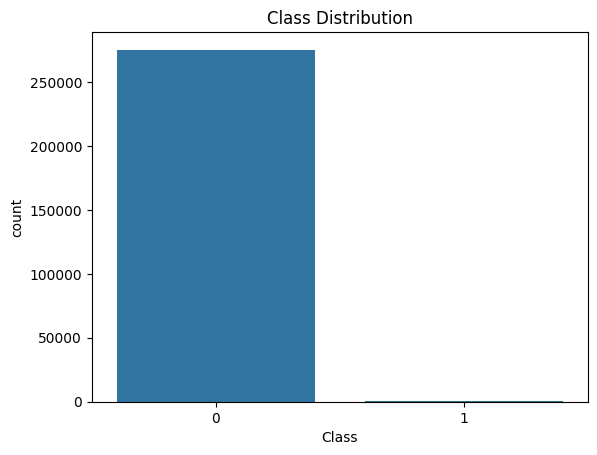

In [11]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# 6: Visualize feature correlations

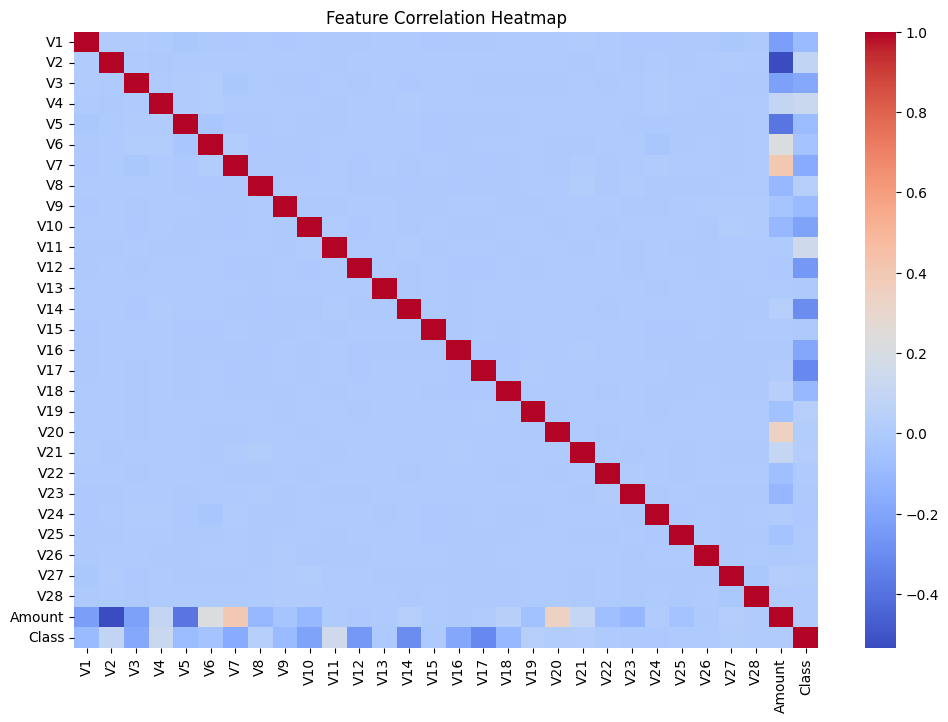

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 7: Prepare data

In [13]:
X = data.drop(columns='Class')
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8: Define and train the model

In [14]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', RandomForestClassifier())])

# 9: Make predictions and evaluate

In [15]:
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.999419585366296
Precision: 0.9041095890410958
Recall: 0.7252747252747253
F1 Score: 0.8048780487804877
Confusion Matrix:
[[55035     7]
 [   25    66]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.90      0.73      0.80        91

    accuracy                           1.00     55133
   macro avg       0.95      0.86      0.90     55133
weighted avg       1.00      1.00      1.00     55133



# 10: Save the model

In [16]:
joblib.dump(pipeline, 'credit_card_model.pkl')

['credit_card_model.pkl']